In [1]:
import tensorflow as tf

d:\Anaconda3\envs\tf26gpu\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\Anaconda3\envs\tf26gpu\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\Anaconda3\envs\tf26gpu\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
d:\Anaconda3\envs\tf26gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# !pip install keras-tcn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.model_selection import train_test_split
from tcn import TCN

In [4]:
def prepare_data(path):
    df = pd.read_csv(path)
    df.columns = ['Date_vix']
    df['Date'] = df['Date_vix'].apply(lambda x: x[0:8])
    df['vix'] = df['Date_vix'].apply(lambda x: x[9:])
    df['vix'] = df['vix'].apply(lambda x: str.replace(x, ' ', ''))
    df['vix'] = df['vix'].apply(lambda x: 0.0 if x == '.' else x)
    df['vix'] = df['vix'].astype(float)
    df['log_vix'] = np.log(df['vix']+1)
    df['Date'] = pd.to_datetime(df['Date'])
    return df

In [5]:
df = prepare_data('./data/VIXdata.txt')
df

,Date_vix,Date,vix,log_vix
0,20010102 29.99,2001-01-02,29.99,3.433665
1,20010102 29.99,2001-01-02,29.99,3.433665
2,20010103 26.60,2001-01-03,26.60,3.317816
3,20010103 26.60,2001-01-03,26.60,3.317816
4,20010104 26.97,2001-01-04,26.97,3.331133
...,...,...,...,...
6185,20220725 23.36,2022-07-25,23.36,3.192942
6186,20220726 24.69,2022-07-26,24.69,3.246102
6187,20220727 23.24,2022-07-27,23.24,3.188004
6188,20220728 22.33,2022-07-28,22.33,3.149740


In [6]:

df = df[['Date','vix','log_vix']].drop_duplicates()
df 


,Date,vix,log_vix
0,2001-01-02,29.99,3.433665
2,2001-01-03,26.60,3.317816
4,2001-01-04,26.97,3.331133
6,2001-01-05,28.67,3.390136
8,2001-01-08,29.84,3.428813
...,...,...,...
6185,2022-07-25,23.36,3.192942
6186,2022-07-26,24.69,3.246102
6187,2022-07-27,23.24,3.188004
6188,2022-07-28,22.33,3.149740


In [7]:
def TcnModel(data,edate,n=1,is_train=True):
  df = data[data['Date']<=edate]
  df = df['log_vix'].values[-600:]
  lookback_window = 14
  x, y = [], []
  x_predict = []
  print()
  for i in range(lookback_window, len(df)+1):

    if i<len(df):
      x.append(df[i - lookback_window:i])
      y.append(df[i])
    else:
      x_predict.append(df[i-lookback_window:i+1])
  x = np.array(x)
  y = np.array(y)
  x_predict = np.array(x_predict)

  if is_train:
  
    # noinspection PyArgumentEqualDefault
    model = Sequential([
        TCN(input_shape=(lookback_window, 1),
            kernel_size=3,
            use_skip_connections=False,
            use_batch_norm=False,
            use_weight_norm=False,
            use_layer_norm=False
            ),
        Dense(7,activation='relu'),
        Dense(1, activation='linear')
    ])

    model.summary()
    model.compile('adam', 'mae')

    print('Train...')
    model.fit(x, y, epochs=100, verbose=2)
    model.save("tcn_model.h5")
  else:
    model = tf.keras.models.load_model('tcn_model.h5', custom_objects={'TCN': TCN}) # 


  p = model.predict(x_predict)
  print("predict result is ", p)
  return p

In [8]:
import datetime 
df['Date'] = df['Date'].astype(str)
date_list = [str(x)[0:10] for x in pd.date_range('20180124','20180308')]
date_list 


['2018-01-24',
 '2018-01-25',
 '2018-01-26',
 '2018-01-27',
 '2018-01-28',
 '2018-01-29',
 '2018-01-30',
 '2018-01-31',
 '2018-02-01',
 '2018-02-02',
 '2018-02-03',
 '2018-02-04',
 '2018-02-05',
 '2018-02-06',
 '2018-02-07',
 '2018-02-08',
 '2018-02-09',
 '2018-02-10',
 '2018-02-11',
 '2018-02-12',
 '2018-02-13',
 '2018-02-14',
 '2018-02-15',
 '2018-02-16',
 '2018-02-17',
 '2018-02-18',
 '2018-02-19',
 '2018-02-20',
 '2018-02-21',
 '2018-02-22',
 '2018-02-23',
 '2018-02-24',
 '2018-02-25',
 '2018-02-26',
 '2018-02-27',
 '2018-02-28',
 '2018-03-01',
 '2018-03-02',
 '2018-03-03',
 '2018-03-04',
 '2018-03-05',
 '2018-03-06',
 '2018-03-07',
 '2018-03-08']

In [9]:
ii = 0
df_result = pd.DataFrame()
for edate in date_list:
    if edate in df['Date'].values:
      if ii%5==0:
        result = TcnModel(df,edate,n=1,is_train=True)
      else:
        result = TcnModel(df,edate,n=1,is_train=False)
      ii = ii+1
      df_result_tmp = pd.DataFrame(result,columns=['predict'])
      df_result_tmp['rdate'] = datetime.datetime.strptime(edate,'%Y-%m-%d')+datetime.timedelta(days=1)
      df_result = pd.concat([df_result,df_result_tmp],axis=0)
    else:
      pass 

df_result


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 64)                136256    
_________________________________________________________________
dense (Dense)                (None, 7)                 455       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 8         
Total params: 136,719
Trainable params: 136,719
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/100
19/19 - 5s - loss: 4.3534
Epoch 2/100
19/19 - 0s - loss: 3.0932
Epoch 3/100
19/19 - 0s - loss: 0.6628
Epoch 4/100
19/19 - 0s - loss: 0.3460
Epoch 5/100
19/19 - 0s - loss: 0.3914
Epoch 6/100
19/19 - 0s - loss: 0.3656
Epoch 7/100
19/19 - 0s - loss: 0.3361
Epoch 8/100
19/19 - 0s - loss: 0.2711
Epoch 9/100
19/19 - 0s - loss: 0.3983
Epoch 10/100
19/19 - 0s - lo

,predict,rdate
0,2.556903,2018-01-25
0,2.562901,2018-01-26
0,2.527607,2018-01-27
0,2.729123,2018-01-30
0,2.766408,2018-01-31
0,2.749236,2018-02-01
0,2.776142,2018-02-02
0,2.984298,2018-02-03
0,3.577581,2018-02-06
0,3.328892,2018-02-07


In [10]:
df_result['rdate'] = df_result['rdate'].astype(str)
df_predict = pd.merge(df,df_result,how='left',left_on=['Date'],right_on=['rdate'])
df_predict 

,Date,vix,log_vix,predict,rdate
0,2001-01-02,29.99,3.433665,NaN,NaN
1,2001-01-03,26.60,3.317816,NaN,NaN
2,2001-01-04,26.97,3.331133,NaN,NaN
3,2001-01-05,28.67,3.390136,NaN,NaN
4,2001-01-08,29.84,3.428813,NaN,NaN
...,...,...,...,...,...
5431,2022-07-25,23.36,3.192942,NaN,NaN
5432,2022-07-26,24.69,3.246102,NaN,NaN
5433,2022-07-27,23.24,3.188004,NaN,NaN
5434,2022-07-28,22.33,3.149740,NaN,NaN


In [11]:
df_predict = df_predict.dropna()
df_predict['predict_'] = np.log(np.expm1(df_predict['predict']))
df_predict 

C:\Users\gaolzhu\AppData\Local\Temp\ipykernel_11744\3949700359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['predict_'] = np.log(np.expm1(df_predict['predict']))


,Date,vix,log_vix,predict,rdate,predict_
4294,2018-01-25,11.58,2.532108,2.556903,2018-01-25,2.476187
4295,2018-01-26,11.08,2.491551,2.562901,2018-01-26,2.482687
4297,2018-01-30,14.79,2.759377,2.729123,2018-01-30,2.661618
4298,2018-01-31,13.54,2.676903,2.766408,2018-01-31,2.701456
4299,2018-02-01,13.47,2.672078,2.749236,2018-02-01,2.683121
4300,2018-02-02,17.31,2.907447,2.776142,2018-02-02,2.711839
4302,2018-02-06,29.98,3.433342,3.577581,2018-02-06,3.549240
4303,2018-02-07,27.73,3.357942,3.328892,2018-02-07,3.292401
4304,2018-02-08,33.46,3.539799,3.355426,2018-02-08,3.319908
4305,2018-02-09,29.06,3.403195,3.486296,2018-02-09,3.455204


<AxesSubplot: >

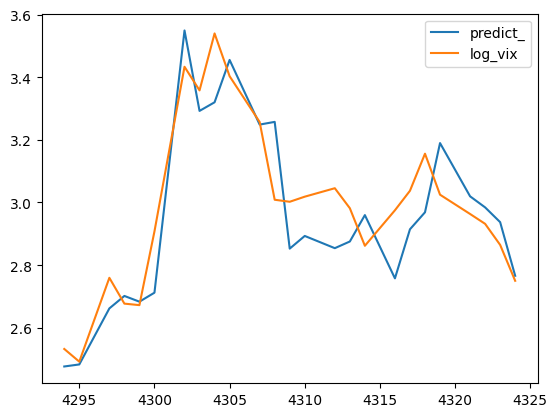

In [12]:
df_predict[['predict_','log_vix']].plot()

In [13]:
def hmse(y_true,y_pred):
    ratio = y_pred/y_true

    # print(ratio[abs(ratio)<2])
    return np.mean(np.power((ratio[abs(ratio)<2]-1),2))

def hmae(y_true,y_pred):
    ratio = y_pred/y_true

    # print(ratio[abs(ratio)<2])
    return np.mean(abs(ratio[abs(ratio)<2]-1))

In [14]:
hmse(df_predict['log_vix'],df_predict['predict_'])

0.0017707575916679436